In [119]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_states(payoff, pne):
    G= nx.DiGraph()
    for key in payoff:
        G.add_node(key)
    pos = {'000': [0, 0], 
           '100': [0.5,0],
           '010': [0, 0.5], 
           '110': [0.5,0.5], 
           '001': [0.3,0.3], 
           '011': [0.3,0.8], 
           '101': [0.8,0.3], 
           '111': [0.8,0.8]
          }
    node_colors = []
    for key in payoff:
        if key in pne:
            node_colors.append([0.3,1,1])
        else:
            node_colors.append([1,1,1])
    nx.draw_networkx_nodes(G, pos,
                           #nodelist=[0, 1, 2, 3],
                           node_color=node_colors,#[[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0.3,1,1],[1,1,1],[0,0,0]],#'w',
                           node_size=2500,
                           alpha=0.8)
    labels = {}
    for i, key in enumerate(payoff):
        labels[key] = key+'\n'+str([int(i) for i in payoff[key]])
    nx.draw_networkx_labels(G, pos, labels, font_size=10)
    
    #for each strategy, check if outgoing improves. If so, add edge
    for i, profile in enumerate(payoff):
        for j, strategy in enumerate(profile):
            deviation = list(profile)
            deviation[j] = str(1-int(strategy))
            deviation = ''.join(deviation)
            if payoff[profile][j]>payoff[deviation][j]:
                #print(j, profile, payoff[profile], deviation, payoff[deviation])
                G.add_edge(deviation,profile,player=j)

    cmap = {0: 'r', 1: 'g', 2: 'b'}

    for edge in G.edges():
        player = G[edge[0]][edge[1]]['player']
        #print(edge, cmap[player])
        nx.draw_networkx_edges(G, pos,
                           edgelist=[edge],
                               arrows=True,
                           width=12, edge_color=cmap[player],
                              style='dashed')

    plt.axis('off')
    plt.show()

{'000': [0.0, 0.0, 0.0], '010': [-1.0, 0.0, 1.0]}


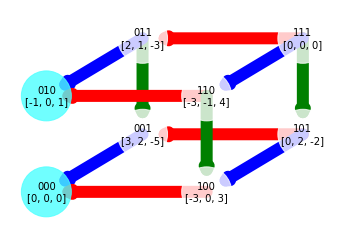

In [120]:
from corpgame import PolymatrixGame
game_settings = {
        "start_populations_matrix": [[6,4],[2,6],[10,0]],
        "topology": "fully_connected",
        'alpha': 1.0,
        'log_level': "error"
    }
game = PolymatrixGame(**game_settings)
game.solve()
print(game.pne)
draw_states(game.payoffs, game.pne)

{}


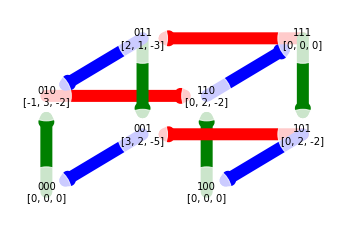

In [121]:
from corpgame import PolymatrixGame
game_settings = {
        "start_populations_matrix": [[6,4],[2,6],[10,6]],
        "topology": "fully_connected",
        'alpha': 1.0,
        'log_level': "error"
    }
game = PolymatrixGame(**game_settings)
game.solve()
print(game.pne)
draw_states(game.payoffs, game.pne)

{'010': [0.0, 0.0, 0.0], '110': [0.0, 0.0, 0.0]}


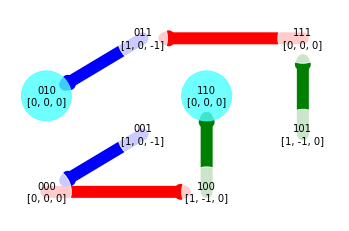

In [122]:
from corpgame import PolymatrixGame
game_settings = {
        "start_populations_matrix": [[6,4],[4,12],[10,6]],
        "topology": "fully_connected",
        'alpha': 0.3,
        'log_level': "error"
    }
game = PolymatrixGame(**game_settings)
game.solve()
print(game.pne)
draw_states(game.payoffs, game.pne)

{'011': [0.0, 0.0, 0.0], '111': [0.0, 0.0, 0.0]}


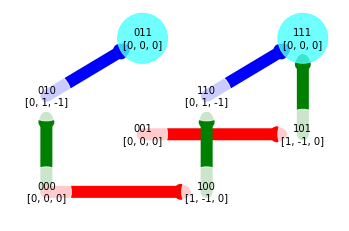

In [124]:
from corpgame import PolymatrixGame
game_settings = {
        "start_populations_matrix": [[6,4],[4,12],[10,6]],
        "topology": [[0,1],[1,2]],
        'alpha': 0.4,
        'log_level': "error"
    }
game = PolymatrixGame(**game_settings)
game.solve()
print(game.pne)
draw_states(game.payoffs, game.pne)